In [12]:
graph = {
    'A' : {'B' : 5, 'C' : 10, 'D' :20},
    'B' : {'A' : 5, 'C' : 4},
    'C' : {'A' : 10, 'B' : 4, 'D' :3},
    'D' : {'A' : 20, 'C' : 3}
}
unfinished = {node : float('inf') for node in graph.keys()}
finished = {}
closest = {}

start_point = 'A'
current_cost = 0
while True:
    for node, cost in graph[start_point].items():
        if node in finished:
            continue
        new_cost = current_cost + cost
        if new_cost < unfinished[node]:
            unfinished[node] = new_cost
            closest[node] = start_point
    finished[start_point] = current_cost
    del unfinished[start_point]
    if len(unfinished) == 0:
        break
    lst = unfinished.items()
    lst.sort(key = lambda x: x[1])
    start_point, current_cost = lst[0][0], lst[0][1]


In [27]:
graph = {
    'A' : set(['B','C','D']),
    'B' : set(['A','E']),
    'C' : set(['A','F']),
    'D' : set(['A','G']),
    'E' : set(['B','H']),
    'F' : set(['C','I']),
    'G' : set(['D','J']),
    'H' : set(['E','I']),
    'I' : set(['F','H','J']),
    'J' : set(['G','I'])
}

In [28]:
def bfs(graph,start):
    queue = [start]
    visited = []
    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.append(node)
            queue.extend(graph[node] - set(queue))
    return visited
bfs(graph,'A')

['A', 'C', 'B', 'D', 'F', 'E', 'G', 'I', 'H', 'J']

In [29]:
def dfs(graph,start):
    queue = [start]
    visited = []
    while queue:
        node = queue.pop()
        if node not in visited:
            visited.append(node)
            queue.extend(graph[node] - set(visited))
    return visited
dfs(graph,'A')

['A', 'D', 'G', 'J', 'I', 'F', 'C', 'H', 'E', 'B']

In [30]:
def bfs_path(graph,start,goal):
    route = [(start,[start])]
    while route:
        node, path = route.pop(0)
        for next in graph[node] - set(path):
            if next == goal:
                yield path + [next]
            else:
                route.append((next,path + [next]))
list(bfs_path(graph,'A','I'))

[['A', 'C', 'F', 'I'], ['A', 'B', 'E', 'H', 'I'], ['A', 'D', 'G', 'J', 'I']]

In [31]:
def dfs_path(graph,start,goal):
    route = [(start,[start])]
    while route:
        node, path = route.pop()
        for next in graph[node] - set(path):
            if next == goal:
                yield path + [next]
            else:
                route.append((next,path + [next]))
list(dfs_path(graph,'A','I'))

[['A', 'D', 'G', 'J', 'I'], ['A', 'B', 'E', 'H', 'I'], ['A', 'C', 'F', 'I']]

In [46]:
class Node():
    def __init__(self,val):
        self.val = val
        self.parent = None
        self.left = None
        self.right = None
        
        
class Tree():
    def __init__(self):
        self.root = None
        
    def insert(self,val):
        if self.root == None:
            self.root = Node(val)
        else:
            self._insert(self.root,val)
            
    def _insert(self,node,val):
        if node.val > val:
            if node.left == None:
                node.left = Node(val)
                node.left.parent = node
            else:
                self._insert(node.left,val)
        else:
            if node.right == None:
                node.right = Node(val)
                node.right.parent = node
            else:
                self._insert(node.right,val)
    
    def find(self,val):
        if self.root != None:
            return self._find(self.root,val)
            
    def _find(self,node,val):
        if node.val == val:
            return node
        elif node.val < val and node.right != None:
            return self._find(node.right,val)
        elif node.val > val and node.left != None:
            return self._find(node.left)
    def print_tree(self):
        if self.root != None:
            self._print_tree(self.root)
            
    def _print_tree(self,node):
        if node != None:
            self._print_tree(node.left)
            print(node.val)
            self._print_tree(node.right)

In [49]:
import numpy as np
lst = []
for n in xrange(30):
    lst.append(np.random.randint(0,100))

In [54]:
def m_sort(lst):
    if len(lst) < 2:
        return lst
    result = []
    mid = len(lst)//2
    y = m_sort(lst[:mid])
    z = m_sort(lst[mid:])
    i = 0
    j = 0
    while i < len(y) and j < len(z):
        if y[i] < z[j]:
            result.append(y[i])
            i+=1
        else:
            result.append(z[j])
            j+=1
    result+=y[i:]
    result+=z[j:]
    return result

In [56]:
def q_sort(lst):
    if len(lst) < 2:
        return lst
    less = []
    equal = []
    greater = []
    pivot = lst[0]
    for element in lst:
        if element < pivot:
            less.append(element)
        elif element > pivot:
            greater.append(element)
        else:
            equal.append(element)
    return q_sort(less) + equal + q_sort(greater)

In [75]:
def binary_search(element,lst):
    lower_bound = 0
    upper_bound = len(lst)
    while lower_bound != upper_bound:
        mid = (lower_bound + upper_bound)//2
        if element == lst[mid]:
            return mid
        elif element > lst[mid]:
            lower_bound = mid+1
        else:
            upper_bound = mid
    return 'not found'
    

In [150]:
import numpy as np
from matplotlib import pyplot as plt

def get_sample(size = 10):
    image = np.array([[np.random.randint(0,2) for i in xrange(size)] for j in xrange(size)])
    visited = np.zeros((size,size),dtype='bool')
    return image,visited

def get_neighbours(x,y,size):
    check = lambda (x,y): True if 0 <= x < size and 0 <= y < size else False
    candidates = [(x+1,y),(x-1,y),(x,y+1),(x,y-1)]
    valid = map(check,candidates)
    return np.array(candidates)[valid]

def visit(x,y,size):
    global visited,image
    visited[x,y] = True
    neighbours = get_neighbours(x,y,size)
    for neighbour in neighbours:
        new_x,new_y = neighbour[0],neighbour[1]
        if visited[new_x,new_y] == False and image[new_x,new_y] == 1:
            visit(new_x,new_y,size)
        else:
            visited[new_x,new_y] = True

def main():
    global image,visited
    image,visited = get_sample()
    size = image.shape[0]
    group_count = 0
    for x in xrange(size):
        for y in xrange(size):
            if visited[x,y] == False and image[x,y] == 1:
                group_count+=1
                visit(x,y,size)
            else:
                visited[x,y] = True
    
    print('{} groups in total'.format(group_count))
    plt.imshow(image)
    if np.sum(visited) == size**2:
        print('visited all cells')
            
    
            

9 groups in total
visited all cells


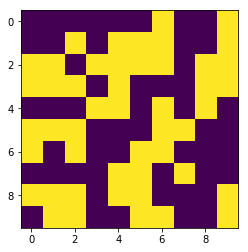

In [152]:
main()

In [154]:
class Node():
    def __init__(self):
        self.value = None
        self.child = {}
        
class Tree():
    def __init__(self):
        self.root = Node()
        
    def insert(self,string,value):
        node = self.root
        i = 0
        while i < len(string):
            if string[i] in node.child:
                node = node.child[string[i]]
                i+=1
            else:
                break
        while i < len(string):
            node.child[string[i]] = Node()
            node = node.child[string[i]]
            i+=1
        node.value = value
        
    def find(self,node,key):
        for char in key:
            if char in node.child:
                node = node.child[char]
            else:
                return 'None'
        return node.value

            
        

In [263]:
class Node():
    def __init__(self,value):
        self.value = value
        self.next = None
        self.previous = None
        
class LinkedList():
    def __init__(self):
        self.head  = None
    
    def insert(self,value):
        if self.head == None:
            self.head = Node(value)
        else:
            self._insert(self.head,value)
        
    def _insert(self,node,value):
        new_node = Node(value)
        new_node.next = self.head
        self.head = new_node

            
    def delete(self,value):
        if self.head != None:
            self._delete
        
        
        
        

In [224]:
class Test():
    count = 0
    def __init__(self):
        Test.count+=1
    def __del__(self):
        Test.count-=1